**Hello everyone.This is a notebook comparing various regression models such as Ridge,Knn,Bayesian Regression,Decision Tree and SVM.**
*It is extremely beneficial for beginners to take a close look at the notebook so as to get an insight as to how different algorithms work and also which algorithms can perform better in some cases depending upon cases*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

!pip install psycopg2-binary

movie-metadatacsv
tmdb-movie-metadata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.2 MB/s eta 0:00:00


In [2]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

f = pd.read_csv("../input/movie-metadatacsv/movie_metadata.csv")

data=DataFrame(f)
data.head()[:2]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


*Getting non-object elements*


In [3]:
X_data=data.dtypes[data.dtypes!='object'].index
X_train=data[X_data]
X_train.head()[:2]

X_train.describe()

# Finding all the columns with NULL values

np.sum(X_train.isnull())

# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['imdb_score']
X_train.drop(['imdb_score'],axis=1,inplace=True)
X_train.head()[:2]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


<AxesSubplot:>

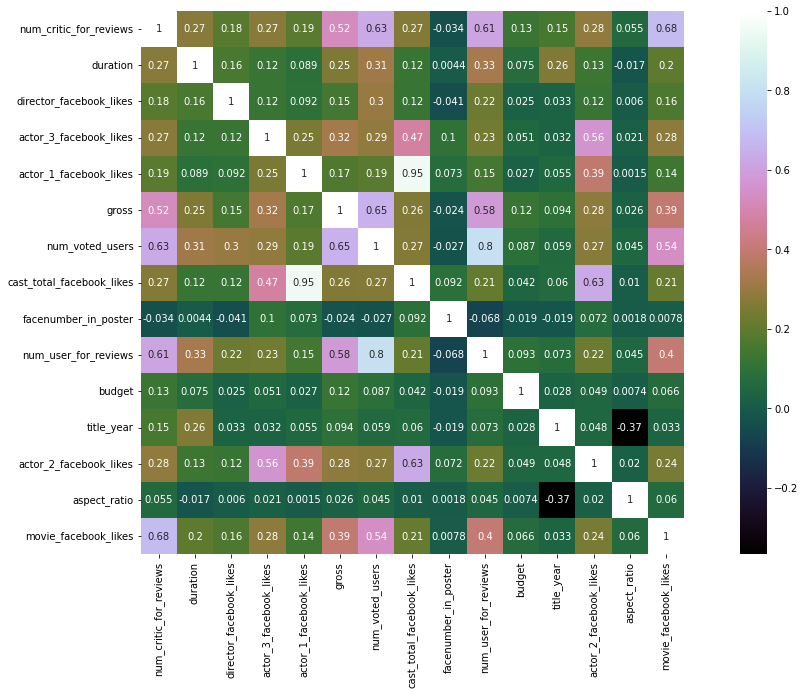

In [4]:
# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

Text(0, 0.5, 'Cumulative explained variance')

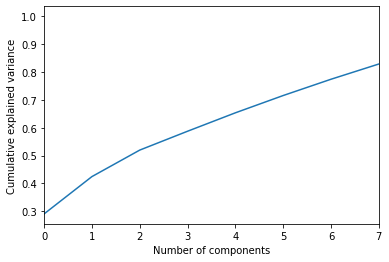

In [5]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Since 5 components can explain more than 70% of the variance, we choose the number of the components to be 5**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-2.0, 2.0)

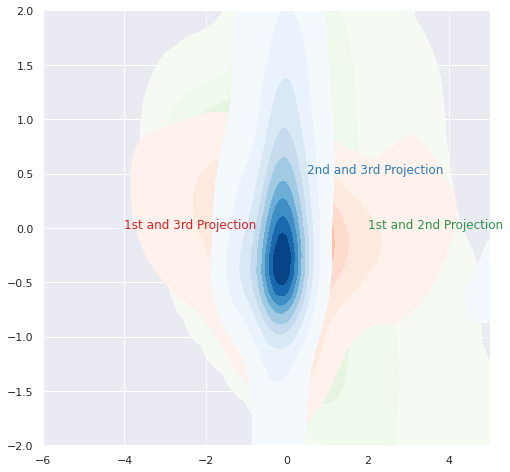

In [6]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, thresh=0.05)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, thresh=0.05)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, thresh=0.05)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [7]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)


Train error = 13.91422673402101 percent in Ridge Regression
Test error = 15.299716605526259 percent in Ridge Regression


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

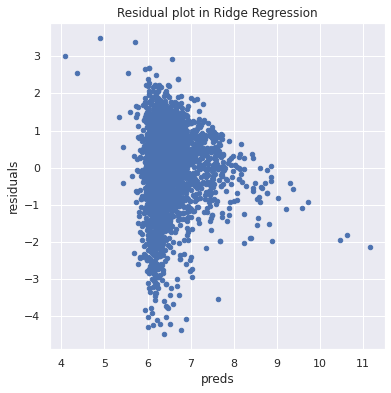

In [8]:
model=linear_model.Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

Train error = 10.812937212714084 percent in Knn algorithm
Test error = 6.878221673331944 percent in knn algorithm


Text(0.5, 1.0, 'Residual plot in Knn')

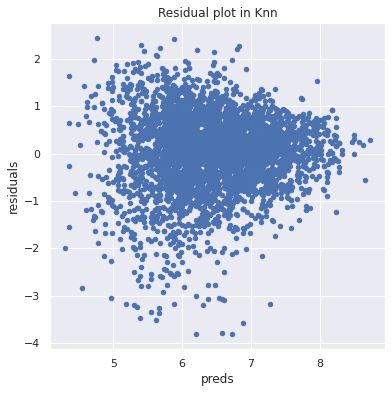

In [9]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

Train error = 13.91749822455012 percent in Bayesian Regression
Test error = 0.025299116548973946 percent in Bayesian Regression


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

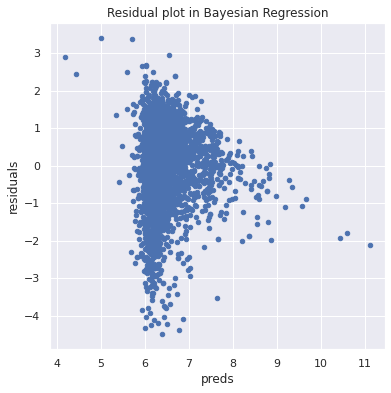

In [10]:
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_bay=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_bay=(error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

Train error = 14.590941891509965 percent in Decision Tree Regressor
Test error = 5.81665008735187 percent in Decision Tree Regressor


Text(0.5, 1.0, 'Residual plot in Decision Tree')

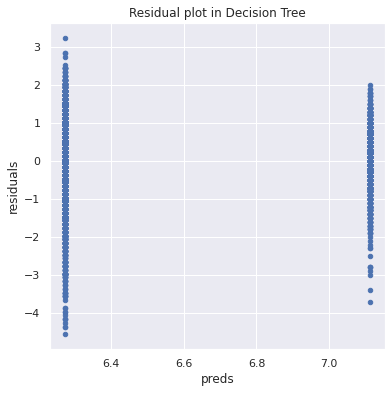

In [11]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-Y_test[i])/Y_test[i])
test_error_tree=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

**SVM**

Train error = 12.357649233763986 percent in SVM Regressor
Test error = 4.940737867736105 percent in SVM Regressor


Text(0.5, 1.0, 'Residual plot in SVM')

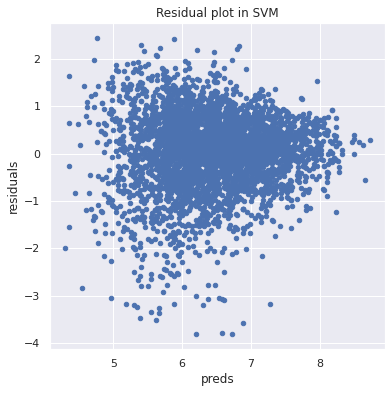

In [12]:
svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-Y_test[i])/Y_test[i])
test_error_svm=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     155.7
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          8.63e-151
Time:                        20:08:41   Log-Likelihood:                -5419.1
No. Observations:                3782   AIC:                         1.085e+04
Df Residuals:                    3776   BIC:                         1.089e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4493      0.017    390.665      0.0

Text(0.5, 1.0, 'Residual plot in OLS')

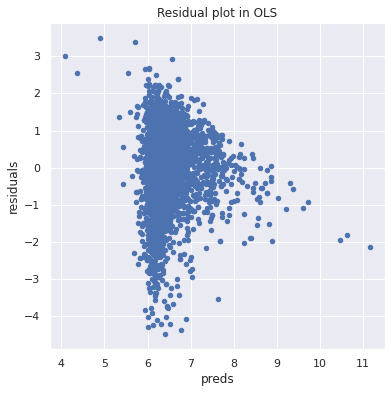

In [13]:
x_train = sm.add_constant(x_train)
# Fit an OLS model using statsmodels
results = sm.OLS(y_train, x_train).fit()
# Print the summary results
print(results.summary())

#Now let's get the predictions:
y1_ols=results.predict(x_train)
y1_ols=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_ols[i]-y_Train[i])/y_Train[i])
train_error_ols=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_ols)+" percent"+" in OLS algorithm")

x_test = sm.add_constant(x_test)

y2_ols=results.predict(x_test)
y2_ols=list(y2_ols)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_ols[i]-Y_test[i])/Y_test[i])
test_error_ols=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ols)+" percent"+" in ols algorithm")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":results.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in OLS")




In [14]:
train_error=[train_error_ridge,train_error_knn,train_error_bay,train_error_tree,train_error_svm, train_error_ols]
test_error=[test_error_ridge,test_error_knn,test_error_bay,test_error_tree,test_error_svm, test_error_ols]

col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM', 'OLS']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
Ridge Regression,13.914227,15.299717
Knn,10.812937,6.878222
Bayesian Regression,13.917498,0.025299
Decision Tree,14.590942,5.816650
SVM,12.357649,4.940738
OLS,10.812937,0.000589


<AxesSubplot:>

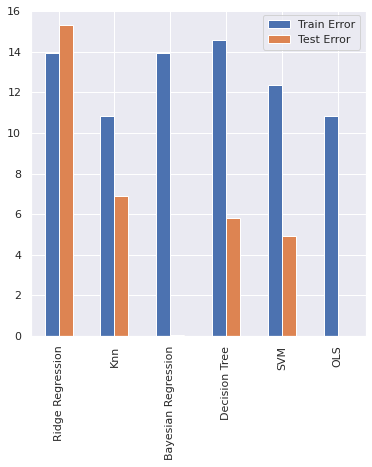

In [15]:
df.plot(kind='bar')

**Seems that KNN turned out to be the winner.Its because of the fact that there are very large number of data points and and also  features are highly continuous**
*Moreover the dimentionality of the processed data is not too high*